## Биометрия и нейротехнологии. Лабораторная работа № 6.

<div style="text-align: right"> 
    Чангалиди Антон, P3214
</div>

## Part1. Image recognition

Туториал [тут](https://medium.com/@guymodscientist/image-prediction-with-10-lines-of-code-3266f4039c7a).

Модель [тут](https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5)

### 0. Установить все библиотеки 
(conda или pip в помощь)

### 1. Download the ResNet Model file which was trained on the ImageNet-1000 dataset and copy the file to your python project folder.

Ну собственно тоже не сложный шаг, модель лежит в директории в файле `resnet50_weights_tf_dim_ordering_tf_kernels.h5`.

### 2. Ну теперь посмотрим, что да как:

In [2]:
# гружу библиотеки
from imageai.Prediction import ImagePrediction
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# подгружаю модель-предиктор
execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath( execution_path + "/models/resnet50_weights_tf_dim_ordering_tf_kernels.h5")
prediction.loadModel()

Машина


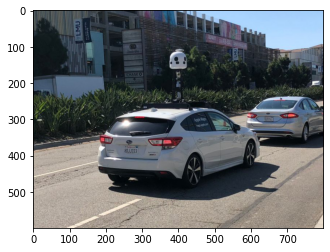

cab  :  9.916095435619354
convertible  :  5.91195710003376
car_wheel  :  5.106288939714432
parking_meter  :  4.874112084507942
minivan  :  4.600738361477852

Машина


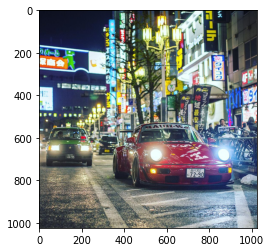

cab  :  95.25439739227295
fire_engine  :  1.232228521257639
streetcar  :  0.8887148462235928
limousine  :  0.6745452061295509
traffic_light  :  0.4729927983134985

Кошка


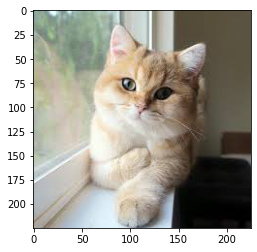

Egyptian_cat  :  26.277899742126465
window_screen  :  18.213091790676117
tabby  :  11.242558062076569
lynx  :  8.651246130466461
Persian_cat  :  8.619104325771332

Собака


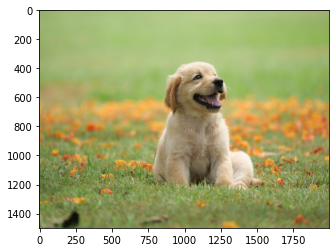

standard_poodle  :  96.96853160858154
miniature_poodle  :  2.383016422390938
soft-coated_wheaten_terrier  :  0.17732945270836353
Bedlington_terrier  :  0.12569973478093743
toy_poodle  :  0.09890336077660322

Тихоходочка


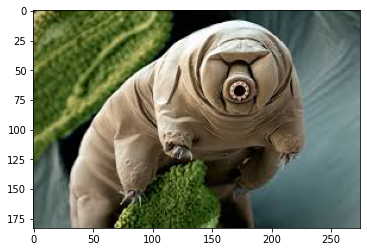

head_cabbage  :  14.263932406902313
African_chameleon  :  10.80339252948761
jackfruit  :  8.577483147382736
broccoli  :  8.410998433828354
stole  :  4.311686754226685

Тихоходочка


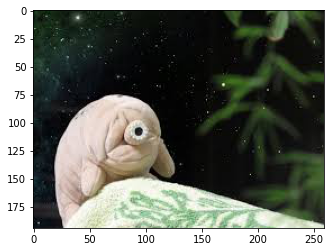

flamingo  :  40.32050371170044
orangutan  :  16.199178993701935
spoonbill  :  3.3734213560819626
eel  :  2.800420857965946
snail  :  2.271421253681183

Я на презентации проектов в ИБ:)


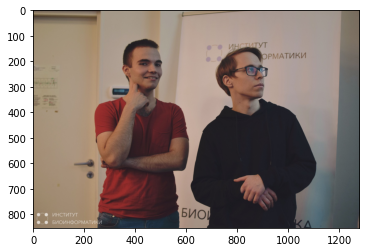

cardigan  :  10.33981367945671
jean  :  8.775612711906433
hand_blower  :  6.1904605478048325
stole  :  5.332506820559502
sunglasses  :  5.259568244218826



In [3]:
# тестинг на изображениях
images = ["/data/car1.jpg", "/data/car2.jpg", "/data/cat1.jpg", "/data/dog1.jpg", "/data/tardigrade1.jpg", "/data/tardigrade2.jpg", "/data/me.jpg"]
names = ['Машина', 'Машина', 'Кошка', 'Собака', 'Тихоходочка', 'Тихоходочка', 'Я на презентации проектов в ИБ:)']
for img, name in zip(images, names):
    print(name)
    path_to_img = execution_path + img
    img_to_draw = mpimg.imread(path_to_img)
    imgplot = plt.imshow(img_to_draw)
    plt.show()
    predictions, percentage_probabilities = prediction.predictImage(path_to_img, result_count=5)
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print()

### Выводы:
* Машины библиотека идентифицирует хорошо (даже колеса, полосы для парковки и тд)
* Кошек и собак он даже пытается идентифицировать вплоть до породы - я меньше в них разбираюсь
* Тихоходочек не идентифицировал (видимо, при обучении модели их просто не было)
* Меня и Мишу в Институте биоинформатики он тоже не идентифицировал(((( Зато, нашу одежду - запросто. Скорее всего, тоже не обучалась эта модель на людях

## Part2. Object Detection

Туториал [тут](https://towardsdatascience.com/object-detection-with-10-lines-of-code-d6cb4d86f606).

Модель [тут](https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5).

### 2.1 Подгружаем модель

In [5]:
from imageai.Detection import ObjectDetection
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

execution_path = os.getcwd()

# print(os.path.join(execution_path , "models/resnet50_coco_best_v2.0.1.h5"))

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( execution_path + "/models/resnet50_coco_best_v2.0.1.h5")
detector.loadModel()


tracking <tf.Variable 'Variable_5:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_6:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_7:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_8:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_9:0' shape=(9, 4) dtype=float32> anchors


### 2.2 Тестим модель

Машина

car  :  99.55471158027649
car  :  97.53137826919556


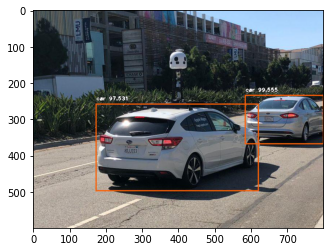

Машина
person  :  50.906902551651
car  :  73.05316925048828
car  :  98.33400845527649
car  :  97.82012701034546


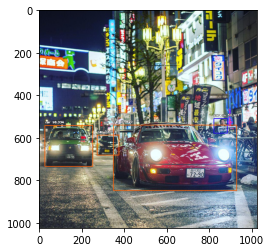

Кошка
cat  :  99.12844896316528


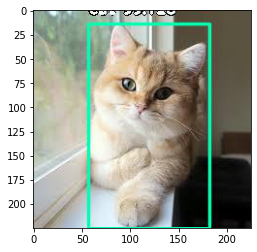

Собака
dog  :  99.95880722999573


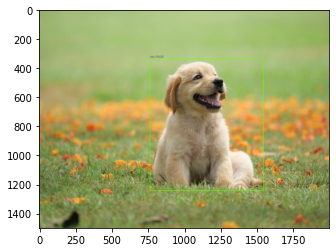

Тихоходочка
broccoli  :  90.11884927749634
person  :  70.0437843799591


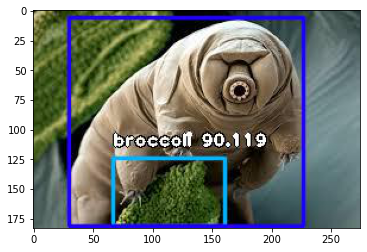

Тихоходочка
teddy bear  :  88.18681240081787


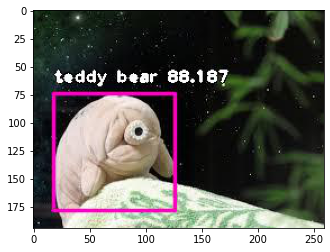

Я на презентации проектов в ИБ:)
person  :  98.67645502090454
person  :  56.6855251789093
person  :  99.95038509368896


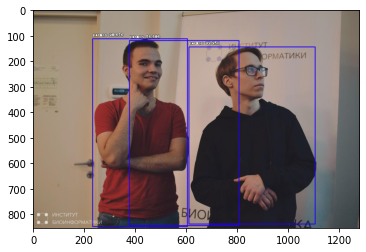

In [6]:
images = ["/data/car1.jpg", "/data/car2.jpg", "/data/cat1.jpg", "/data/dog1.jpg", "/data/tardigrade1.jpg", "/data/tardigrade2.jpg", "/data/me.jpg"]
new_images = ["/output/car1.jpg", "/output/car2.jpg", "/output/cat1.jpg", "/output/dog1.jpg", "/output/tardigrade1.jpg", "/output/tardigrade2.jpg", "/output/me.jpg"]
names = ['Машина', 'Машина', 'Кошка', 'Собака', 'Тихоходочка', 'Тихоходочка', 'Я на презентации проектов в ИБ:)']


def draw(path_to_img):
    img_to_draw = mpimg.imread(path_to_img)
    imgplot = plt.imshow(img_to_draw)
    plt.show()


for img, new_img, name  in zip(images, new_images, names):
    print(name)
    to_draw_input = execution_path + img
    to_draw_output = execution_path + new_img
#     draw(to_draw_input)
    detections = detector.detectObjectsFromImage(input_image=to_draw_input, output_image_path=to_draw_output)
    for eachObject in detections:
        print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    draw(to_draw_output)

### Выводы
* Пришлось установить Tensor flow версии 1.15, так как с v2.X ImageAI не работает(
* Тут все достаточно хорошо распозналось (кроме тех же тихоходочек), особо нечего говорить, только на фотке со мной распозналось 3 человека, вместо 2х.

### Part 3. Video детектинг


Туториал [тут](https://towardsdatascience.com/train-image-recognition-ai-with-5-lines-of-code-8ed0bdd8d9ba).

Модель [тут](https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5).

### 3.1 Подгружаем модель

In [7]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(execution_path +"/models/yolo.h5")
detector.loadModel()

In [8]:
video_path = detector.detectObjectsFromVideo(input_file_path=execution_path+"/data/traffic-mini.mp4",
                                output_file_path=execution_path + "/output/traffic_mini_detected_1"
                                , frames_per_second=29, log_progress=True)
print(f'Результат можно посмотреть по пути: ./output/traffic_mini_detected_1')

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

### Выводы:
* насколько я понял, каждое видео разбивается на изображение и далее идентифицируются объекты. Поэтому все работает хорошо, но, возможно, хотелось бы быстрее.